<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_data(y_hat)_multi_delta_(_1_6)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_-1.6'

In [4]:
os.listdir(base_path)

['data_multi_delta_-1.6_n250.csv',
 'data_multi_delta_-1.6_n120.csv',
 'data_multi_delta_-1.6_n60.csv',
 'data_multi_delta_-1.6_n30.csv',
 'data_multi_delta_-1.6_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-1.6_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,96.350624,-0.035317,106.315307,106.352979,-0.037672
1,0.0,1.0,58.584420,-0.061161,68.523259,68.583733,-0.060474
2,0.0,2.0,55.609543,-0.009899,65.599645,65.608617,-0.008972
3,0.0,3.0,91.830161,0.009972,101.840133,101.832152,0.007981
4,0.0,4.0,73.093104,0.021836,83.114940,83.093586,0.021354
...,...,...,...,...,...,...,...
249995,999.0,245.0,51.027992,-0.017731,61.010261,61.030912,-0.020652
249996,999.0,246.0,62.770489,-0.067674,72.702815,72.771720,-0.068905
249997,999.0,247.0,26.564295,0.042609,36.606904,36.570734,0.036170
249998,999.0,248.0,55.422649,0.034365,65.457014,65.424937,0.032077


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,96.350624,-0.035317,106.315307,106.352979,-0.037672
1,0.0,1.0,58.584420,-0.061161,68.523259,68.583733,-0.060474
2,0.0,2.0,55.609543,-0.009899,65.599645,65.608617,-0.008972
3,0.0,3.0,91.830161,0.009972,101.840133,101.832152,0.007981
4,0.0,4.0,73.093104,0.021836,83.114940,83.093586,0.021354
...,...,...,...,...,...,...,...
249995,999.0,245.0,51.027992,-0.017731,61.010261,61.030912,-0.020652
249996,999.0,246.0,62.770489,-0.067674,72.702815,72.771720,-0.068905
249997,999.0,247.0,26.564295,0.042609,36.606904,36.570734,0.036170
249998,999.0,248.0,55.422649,0.034365,65.457014,65.424937,0.032077


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    96.350624 -0.035317  106.315307  106.352979 -0.037672
      1.0    58.584420 -0.061161   68.523259   68.583733 -0.060474
      2.0    55.609543 -0.009899   65.599645   65.608617 -0.008972
      3.0    91.830161  0.009972  101.840133  101.832152  0.007981
      4.0    73.093104  0.021836   83.114940   83.093586  0.021354
...                ...       ...         ...         ...       ...
999.0 245.0  51.027992 -0.017731   61.010261   61.030912 -0.020652
      246.0  62.770489 -0.067674   72.702815   72.771720 -0.068905
      247.0  26.564295  0.042609   36.606904   36.570734  0.036170
      248.0  55.422649  0.034365   65.457014   65.424937  0.032077
      249.0  72.167530  0.056415   82.223945   82.167409  0.056536

[250000 rows x 5 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    96.350624 -0.035317  106.315307  106.352979 -0.037672
      1.0    58.584420 -0.061161   68.523259   68.583733 -0.060474
      2.0    55.609543 -0.009899   65.599645   65.608617 -0.008972
      3.0    91.830161  0.009972  101.840133  101.832152  0.007981
      4.0    73.093104  0.021836   83.114940   83.093586  0.021354
...                ...       ...         ...         ...       ...
999.0 245.0  51.027992 -0.017731   61.010261   61.030912 -0.020652
      246.0  62.770489 -0.067674   72.702815   72.771720 -0.068905
      247.0  26.564295  0.042609   36.606904   36.570734  0.036170
      248.0  55.422649  0.034365   65.457014   65.424937  0.032077
      249.0  72.167530  0.056415   82.223945   82.167409  0.056536

[250000 rows x 5 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,96.350624,-0.035317,106.315307,106.352979,-0.037672
1,0.0,1.0,58.584420,-0.061161,68.523259,68.583733,-0.060474
2,0.0,2.0,55.609543,-0.009899,65.599645,65.608617,-0.008972
3,0.0,3.0,91.830161,0.009972,101.840133,101.832152,0.007981
4,0.0,4.0,73.093104,0.021836,83.114940,83.093586,0.021354
...,...,...,...,...,...,...,...
249995,999.0,245.0,51.027992,-0.017731,61.010261,61.030912,-0.020652
249996,999.0,246.0,62.770489,-0.067674,72.702815,72.771720,-0.068905
249997,999.0,247.0,26.564295,0.042609,36.606904,36.570734,0.036170
249998,999.0,248.0,55.422649,0.034365,65.457014,65.424937,0.032077


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    96.350624 -0.035317  106.315307  106.352979 -0.037672
      1.0    58.584420 -0.061161   68.523259   68.583733 -0.060474
      2.0    55.609543 -0.009899   65.599645   65.608617 -0.008972
      3.0    91.830161  0.009972  101.840133  101.832152  0.007981
      4.0    73.093104  0.021836   83.114940   83.093586  0.021354
...                ...       ...         ...         ...       ...
999.0 245.0  51.027992 -0.017731   61.010261   61.030912 -0.020652
      246.0  62.770489 -0.067674   72.702815   72.771720 -0.068905
      247.0  26.564295  0.042609   36.606904   36.570734  0.036170
      248.0  55.422649  0.034365   65.457014   65.424937  0.032077
      249.0  72.167530  0.056415   82.223945   82.167409  0.056536

[250000 rows x 5 columns]

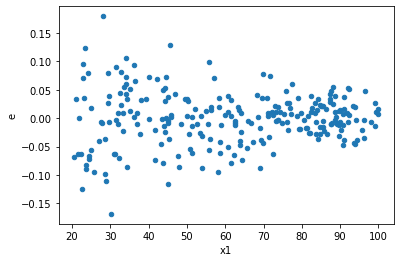

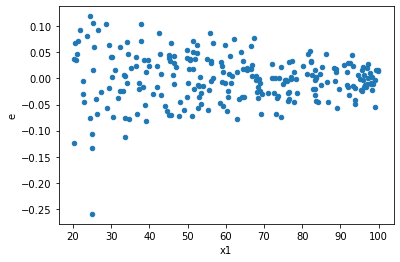

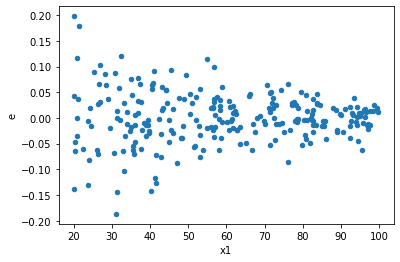

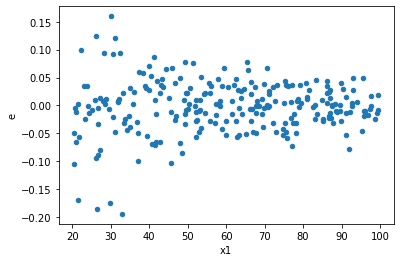

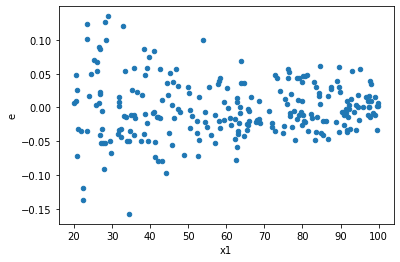

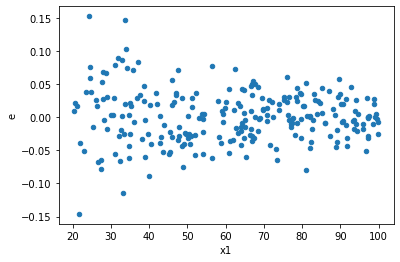

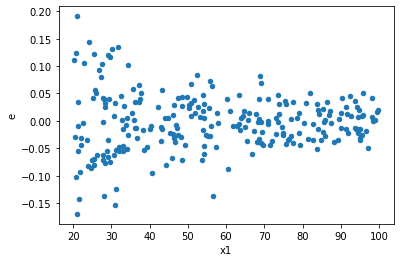

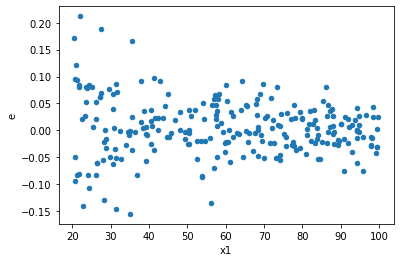

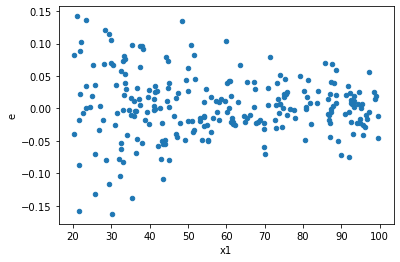

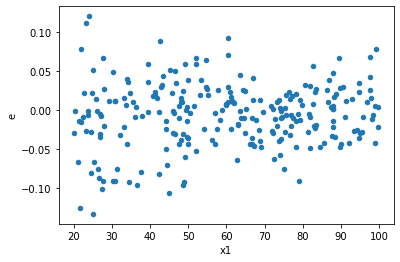

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)

    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,99.0,99.0,0.3846291864598701,0.064078661672494,0.0038851432975744453,0.0006472592088130707,0.16659854199384733,4.949157853294242e-17,Reject001=0 : Heteroscedasticity
1.0,99.0,99.0,0.3838050256377194,0.06940273851041674,0.0038768184407850445,0.0007010377627314822,0.18082811290732617,8.860740053247923e-16,Reject001=0 : Heteroscedasticity
2.0,99.0,99.0,0.4664066258666882,0.0765370377378099,0.004711178039057457,0.000773101391291009,0.1640993791535163,2.8817545829641425e-17,Reject001=0 : Heteroscedasticity
3.0,99.0,99.0,0.39707509525716495,0.08385215313180018,0.004010859548052171,0.0008469914457757594,0.21117454641040506,1.6514115087279424e-13,Reject001=0 : Heteroscedasticity
4.0,99.0,99.0,0.32365973740497944,0.08206323186233476,0.003269290276817974,0.0008289215339629774,0.25354785405282926,5.1008422597054676e-11,Reject001=0 : Heteroscedasticity
5.0,99.0,99.0,0.25641236610036694,0.0714075857209538,0.0025900239000037064,0.0007212887446560991,0.27848729297635705,7.936008026839052e-10,Reject001=0 : Heteroscedasticity
6.0,99.0,99.0,0.4959631877120864,0.08516263506071768,0.005009729168808954,0.0008602286369769462,0.17171160515678388,1.4479695276472955e-16,Reject001=0 : Heteroscedasticity
7.0,99.0,99.0,0.47128987361543834,0.10656100479409496,0.004760503773893317,0.001076373785798939,0.22610501680553033,1.488281201337216e-12,Reject001=0 : Heteroscedasticity
8.0,99.0,99.0,0.4181226116743169,0.09365736958210845,0.0042234607239829995,0.0009460340361829137,0.22399498847256752,1.1049427661910709e-12,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64